In [1]:
from fontTools.ttLib import TTFont
font = TTFont("cambria.ttc", fontNumber=0)
print('glyphID is: ' + str(font.getGlyphID("a")))

glyphID is: 131


In [2]:
print(ord('a'))

97


In [3]:
glyph = font.getGlyphSet()['a']
print('width of glyph is ' + str(glyph.width))

width of glyph is 1000


In [4]:
units_per_em = font['head'].unitsPerEm
print('units per em is: ' + str(units_per_em))

units per em is: 2048


In [5]:
len(font.getGlyphNames())

7614

In [6]:
font.getGlyphNames()[:10]

['.notdef',
 'A',
 'AE',
 'AEacute',
 'Aacute',
 'Abreve',
 'Acircumflex',
 'Adieresis',
 'Agrave',
 'Alpha']

In [7]:
font.getBestCmap()

{0: 'uni0000',
 13: 'uni000D',
 32: 'space',
 33: 'exclam',
 34: 'quotedbl',
 35: 'numbersign',
 36: 'dollar',
 37: 'percent',
 38: 'ampersand',
 39: 'quotesingle',
 40: 'parenleft',
 41: 'parenright',
 42: 'asterisk',
 43: 'plus',
 44: 'comma',
 45: 'hyphen',
 46: 'period',
 47: 'slash',
 48: 'zero',
 49: 'one',
 50: 'two',
 51: 'three',
 52: 'four',
 53: 'five',
 54: 'six',
 55: 'seven',
 56: 'eight',
 57: 'nine',
 58: 'colon',
 59: 'semicolon',
 60: 'less',
 61: 'equal',
 62: 'greater',
 63: 'question',
 64: 'at',
 65: 'A',
 66: 'B',
 67: 'C',
 68: 'D',
 69: 'E',
 70: 'F',
 71: 'G',
 72: 'H',
 73: 'I',
 74: 'J',
 75: 'K',
 76: 'L',
 77: 'M',
 78: 'N',
 79: 'O',
 80: 'P',
 81: 'Q',
 82: 'R',
 83: 'S',
 84: 'T',
 85: 'U',
 86: 'V',
 87: 'W',
 88: 'X',
 89: 'Y',
 90: 'Z',
 91: 'bracketleft',
 92: 'backslash',
 93: 'bracketright',
 94: 'asciicircum',
 95: 'underscore',
 96: 'grave',
 97: 'a',
 98: 'b',
 99: 'c',
 100: 'd',
 101: 'e',
 102: 'f',
 103: 'g',
 104: 'h',
 105: 'i',
 106: 'j'

In [8]:
font.getBestCmap()[ord('ã')]

'atilde'

798, 747
536, -5
397, -5
157, 737
141.66666666666666, 785.0
128.83333333333334, 818.8333333333334
118.5, 838.5
108.16666666666667, 858.1666666666666
97.16666666666667, 872.8333333333334
85.5, 882.5
73.83333333333333, 892.1666666666666
55.0, 900.3333333333334
29, 907
29, 956
424, 956
424, 907
385.3333333333333, 899.0
359.1666666666667, 888.5
345.5, 875.5
331.8333333333333, 862.5
325.0, 843.0
325, 817
325.0, 799.0
327.0, 780.1666666666666
331.0, 760.5
335.0, 740.8333333333334
341.0, 718.0
349, 692
506, 182
763, 956
904, 956
1122, 182
1298, 671
1307.3333333333333, 696.3333333333334
1315.0, 720.5
1321.0, 743.5
1327.0, 766.5
1330.0, 788.0
1330, 808
1330.0, 836.0
1322.5, 857.6666666666666
1307.5, 873.0
1292.5, 888.3333333333334
1267.0, 899.6666666666666
1231, 907
1231, 956
1580, 956
1580, 907
1561.3333333333333, 902.3333333333334
1547.3333333333333, 897.5
1538.0, 892.5
1528.6666666666667, 887.5
1519.5, 880.1666666666666
1510.5, 870.5
1501.5, 860.8333333333334
1491.5, 845.8333333333334
1480.5

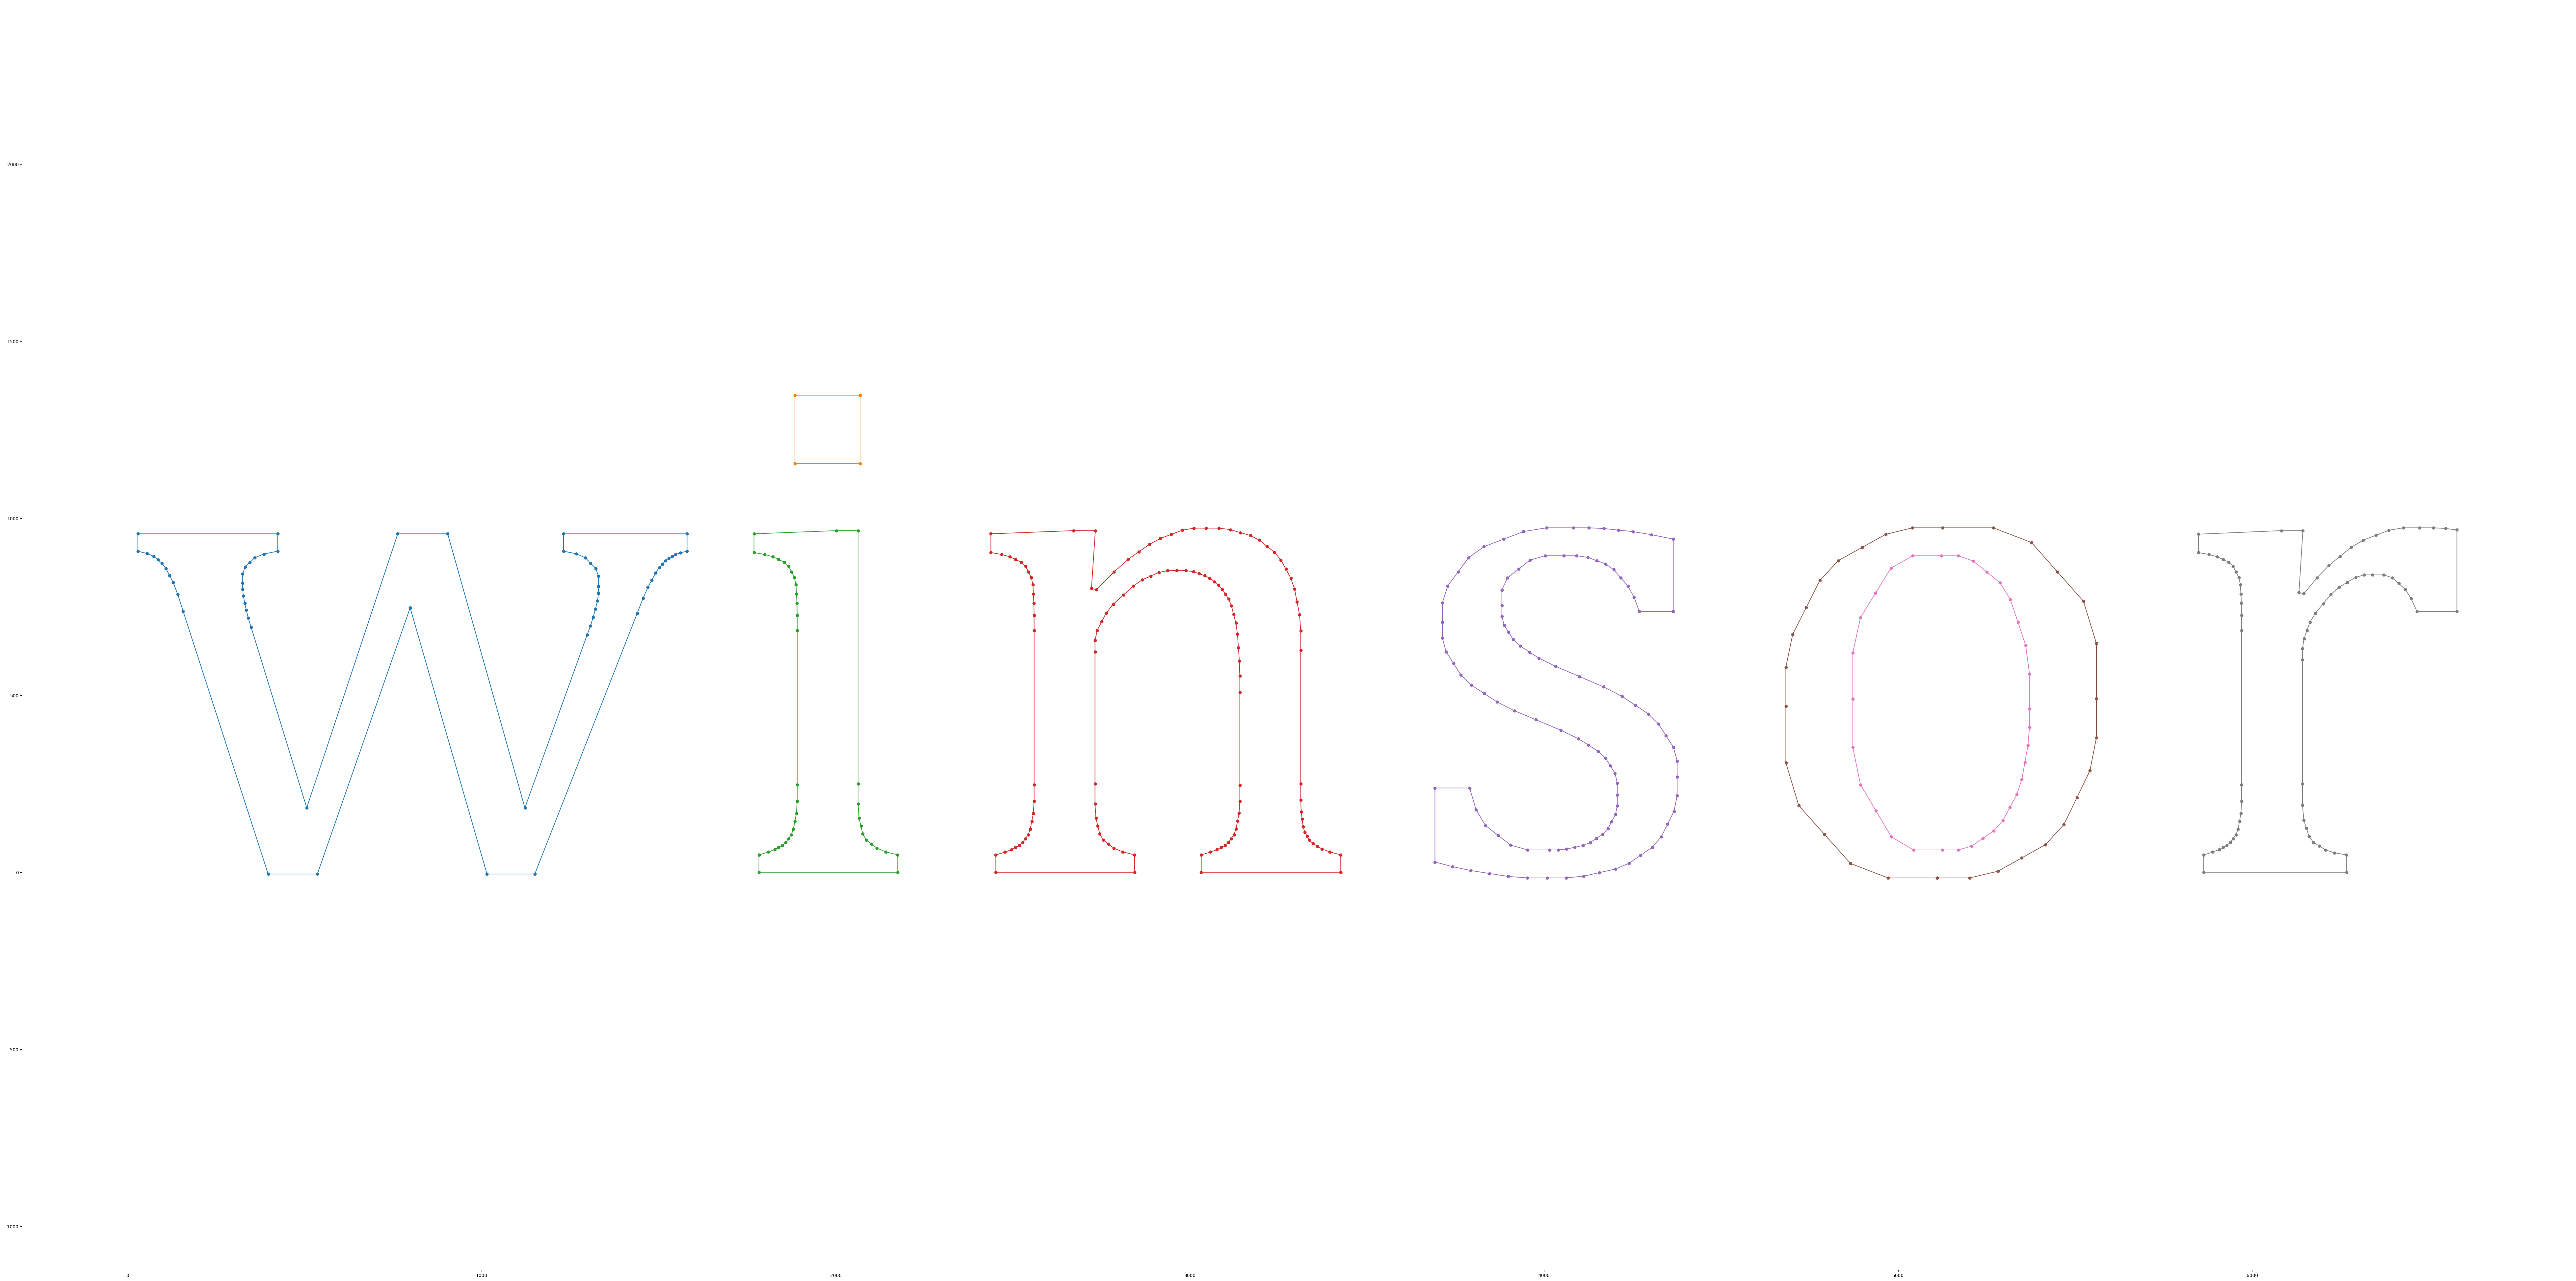

In [15]:
import matplotlib.pyplot as plt
from fontTools.pens.basePen import BasePen
from fontTools.ttLib import TTFont

font = TTFont("cambria.ttc", fontNumber=0)
# print('glyphID is: ' + str(font.getGlyphID("a")))

class MatplotlibPen(BasePen):
    def __init__(self, glyphSet):
        super().__init__(glyphSet)
        self.paths = []

    def _moveTo(self, p0):
        self.paths.append([p0])

    def _lineTo(self, p1):
        self.paths[-1].append(p1)

    def _curveToOne(self, p1, p2, p3):
        self.paths[-1].extend([p1, p2, p3])

    def _closePath(self):
        self.paths[-1].append(self.paths[-1][0])

text = "winsor"  # String of characters to plot
x_offset = 0  # Initial x-offset for positioning characters
spacing = 100  # Spacing between characters

scale=10  # Scale factor for the plot
plt.figure(figsize=(10*scale, 5*scale))  # Set figure size

for char in text:
    glyph = font.getGlyphSet()[char]
    pen = MatplotlibPen(font.getGlyphSet())
    glyph.draw(pen)
    
    # Plot the glyph with the current x_offset
    for path in pen.paths:
        x, y = zip(*path)
        x = [point_x + x_offset for point_x in x]  # Apply x_offset to x-coordinates
        print("==========================")
        for point_x, point_y in zip(x, y):
            print(f"{point_x}, {point_y}")
        # print(f"{x}, {y}")
        plt.plot(x, y, marker='o')
    
    # Update x_offset for the next character
    x_offset += glyph.width + spacing

plt.axis('equal')
plt.show()
